In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

In [2]:
df = pd.read_csv(r"C:\Users\KEMENKEU\Desktop\OneDrive - Kemenkeu\Sinau\Pacmann\Intro to Probability\Tugas\Project\insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### 1. rata-rata umur pengguna

In [5]:
df.loc[:, ["age"]].mean()

age    39.207025
dtype: float64

##### 2. rata-rata BMI dari pengguna yang merokok

In [6]:
df_bmi_rokok = df.loc[df['smoker'] == 'yes', ['bmi','smoker']]
df_bmi_rokok

,bmi,smoker
0,27.900,yes
11,26.290,yes
14,42.130,yes
19,35.300,yes
23,31.920,yes
...,...,...
1313,34.700,yes
1314,23.655,yes
1321,26.695,yes
1323,40.370,yes


In [7]:
df_bmi_rokok['bmi'].mean()

30.708448905109503

##### Apakah variansi dari data charges perokok dan non perokok sama?

In [8]:
# perokok
df_charge_rokok = df.loc[df['smoker'] == 'yes', ['charges']]
df_charge_rokok

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


In [9]:
# non perokok
df_charge_nonrokok = df.loc[df['smoker'] == 'no', ['charges']]
df_charge_nonrokok

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [10]:
# variance charges perokok vs variance charges non rokok
var_charges_rokok = np.var(df_charge_rokok).item()
print('variance charges perokok adalah sebesar', var_charges_rokok)

var_charges_nonrokok = np.var(df_charge_nonrokok).item()
print('variance charges non perokok adalah sebesar', var_charges_nonrokok)


variance charges perokok adalah sebesar 132721153.13625304
variance charges non perokok adalah sebesar 35891656.00316425


### dapat diketahui bahwa variance charges perokok dengan variance charges non perokok besarnya tidak sama

##### umur perokok perempuan vs perokok laki-laki

In [11]:
# rata-rata umur perokok perempuan
df.loc[(df['smoker'] == 'yes') & (df['sex'] == 'female'), ['age']].mean()

age    38.608696
dtype: float64

In [12]:
# rata-rata umur perokok laki-laki
df.loc[(df['smoker'] == 'yes') & (df['sex'] == 'male'), ['age']].mean()

age    38.446541
dtype: float64

##### rata-rata tagihan kesehatan perokok vs non perokok

In [13]:
# rata-rata tagihan kesehatan perokok
df_charge_rokok.mean().round(2)

charges    32050.23
dtype: float64

In [14]:
# rata-rata tagihan kesehatan non perokok
df_charge_nonrokok.mean().round(2)

charges    8434.27
dtype: float64

In [15]:
# ini kalo mau ngambil besaran rata-ratanya aja tanpa dtype nya
df_charge_rokok.mean().item()

32050.23183153285

##### 8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

In [16]:
# rata-rata tagihan perokok bmi di atas 25
print("rata-rata tagihan perokok yang bmi-nya di atas 25 adalah sebesar",
      df.loc[(df['smoker'] == 'yes') & (df['bmi'] > 25), ['charges']].mean().item())

rata-rata tagihan perokok yang bmi-nya di atas 25 adalah sebesar 35116.90965694065


In [17]:
# rata-rata tagihan non perokok bmi di atas 25
print("rata-rata tagihan non perokok yang bmi-nya di atas 25 adalah sebesar",
      df.loc[(df['smoker'] == 'no') & (df['bmi'] > 25), ['charges']].mean().item())

rata-rata tagihan non perokok yang bmi-nya di atas 25 adalah sebesar 8629.589609712148


##### 9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [18]:
# rata-rata BMI laki-laki
print("rata-rata BMI laki-laki yakni sebesar ",df.loc[df['sex'] == 'male', ['bmi']].mean().item())
# rata-rata BMI perempuan
print("rata-rata BMI perempuan yakni sebesar ",df.loc[df['sex'] == 'female', ['bmi']].mean().item())

rata-rata BMI laki-laki yakni sebesar  30.943128698224832
rata-rata BMI perempuan yakni sebesar  30.377749244713023


##### 10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [19]:
# rata-rata bmi non rokok 
df_bmi_rokok['bmi'].mean()

30.708448905109503

In [20]:
# bmi non perokok
df.loc[df['smoker'] == 'no', ['bmi']].mean().item()

30.651795112781922

##### 11. rata-rata BMI

In [284]:
# rata-rata bmi
df['bmi'].mean()

30.663396860986538

##### 12. rata-rata tagihan

In [285]:
df['charges'].mean()

13270.422265141257

## Bagian 2

##### 1. Gender mana yang memiliki tagihan paling tinggi?

In [21]:
df.sort_values(by = 'charges', ascending = False)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
22,18,male,34.100,0,no,southeast,1137.01100
663,18,male,33.660,0,no,southeast,1136.39940
1244,18,male,33.330,0,no,southeast,1135.94070
808,18,male,30.140,0,no,southeast,1131.50660


tagihan paling tinggi ada di perempuan

##### Distribusi peluang tagihan di tiap-tiap region

In [22]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
# total charges
total_charges = df['charges'].sum()

In [24]:
# membuat variabel peluang tagihan per region
sw = df.loc[df['region'] == 'southwest', ['charges']].sum().item()/total_charges 
se = df.loc[df['region'] == 'southeast', ['charges']].sum().item()/total_charges
nw = df.loc[df['region'] == 'northwest', ['charges']].sum().item()/total_charges
ne = df.loc[df['region'] == 'northeast', ['charges']].sum().item()/total_charges


In [25]:
# cek apakah total peluang tagihan per region = 1
sw+se+nw+ne

1.0

In [26]:
d = {'region': ['southwest', 'southeast', 'northwest', 'northeast'], 'probability': [sw, se, nw, ne]}
prob_charges = pd.DataFrame(data=d)
prob_charges

,region,probability
0,southwest,0.225997
1,southeast,0.302081
2,northwest,0.227289
3,northeast,0.244633


<AxesSubplot:xlabel='region', ylabel='probability'>

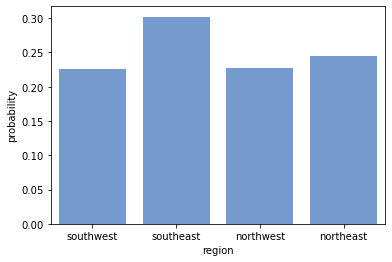

In [27]:
sns.barplot(data=prob_charges, x="region", y="probability", color = '#69d')

##### Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
# menghitung proporsi pengguna per region
prop_sw = df.loc[df['region'] == 'southwest', ['region']].count().item()/1338
prop_se = df.loc[df['region'] == 'southeast', ['region']].count().item()/1338
prop_nw = df.loc[df['region'] == 'northwest', ['region']].count().item()/1338
prop_ne = df.loc[df['region'] == 'northeast', ['region']].count().item()/1338

In [30]:
prop = {'region': ['southwest', 'southeast', 'northwest', 'northeast'], 'proporsi': [prop_sw, prop_se, prop_nw, prop_ne]}
proporsi = pd.DataFrame(data=prop)
proporsi

,region,proporsi
0,southwest,0.242900
1,southeast,0.272048
2,northwest,0.242900
3,northeast,0.242152


<AxesSubplot:xlabel='region', ylabel='proporsi'>

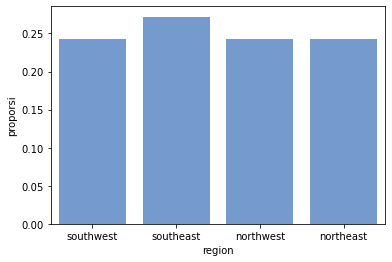

In [31]:
sns.barplot(data = proporsi, x= 'region', y= 'proporsi', color = '#69d' )

##### Mana yang lebih tinggi proporsi perokok atau non perokok?

In [32]:
prop_rokok = df.loc[df['smoker'] == 'yes', ['smoker']].count().item()/1338
prop_nonrokok = df.loc[df['smoker'] == 'no', ['smoker']].count().item()/1338

In [33]:
data_rokok = {'pilihan': ['perokok', 'non perokok'], 'proporsi': [prop_rokok, prop_nonrokok]}
proporsi_rokok = pd.DataFrame(data=data_rokok)
proporsi_rokok

,pilihan,proporsi
0,perokok,0.204783
1,non perokok,0.795217


<AxesSubplot:xlabel='pilihan', ylabel='proporsi'>

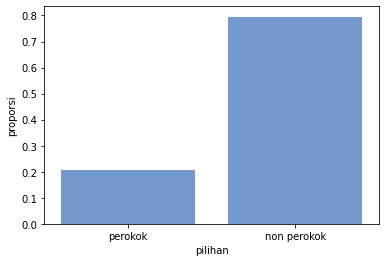

In [34]:
sns.barplot(data = proporsi_rokok, x= 'pilihan', y= 'proporsi', color = '#69d' )

##### Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [35]:
n_p_dan_rokok = df.loc[(df['sex'] == 'female') & (df['smoker'] == 'yes'), ['smoker']].count().item()

In [36]:
n_rokok = df.loc[df['smoker'] == 'yes',['smoker']].count().item()

In [37]:
# peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
print("peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok adalah sebesar ", n_p_dan_rokok/n_rokok)

peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok adalah sebesar  0.4197080291970803


##### Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [38]:
n_l_dan_rokok = df.loc[(df['sex'] == 'male') & (df['smoker'] == 'yes'), ['smoker']].count().item()

In [39]:
# peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
print("peluang seseorang tersebut adalah laki-laki jika diketahui dia adalah perokok adalah sebesar ", n_l_dan_rokok/n_rokok)

peluang seseorang tersebut adalah laki-laki jika diketahui dia adalah perokok adalah sebesar  0.5802919708029197


##### Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

In [40]:
# membuat variable untuk menyimpan charges per region 
sw_charges = df.loc[df['region'] == 'southwest', ['charges']]
se_charges = df.loc[df['region'] == 'southeast', ['charges']]
nw_charges = df.loc[df['region'] == 'northwest', ['charges']]
ne_charges = df.loc[df['region'] == 'northeast', ['charges']]

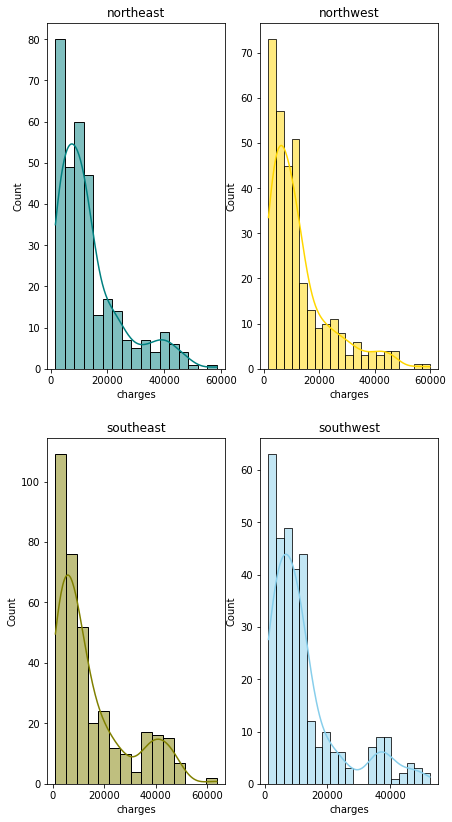

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(7, 14))

sns.histplot(data=sw_charges, x="charges", kde=True, color="skyblue", ax=axs[1, 1]).title.set_text('southwest')
sns.histplot(data=se_charges, x="charges", kde=True, color="olive", ax=axs[1, 0]).title.set_text('southeast')
sns.histplot(data=nw_charges, x="charges", kde=True, color="gold", ax=axs[0, 1]).title.set_text('northwest')
sns.histplot(data=ne_charges, x="charges", kde=True, color="teal", ax=axs[0, 0]).title.set_text('northeast')

plt.show()

array([[<AxesSubplot:title={'center':'northeast'}>,
        <AxesSubplot:title={'center':'northwest'}>],
       [<AxesSubplot:title={'center':'southeast'}>,
        <AxesSubplot:title={'center':'southwest'}>]], dtype=object)

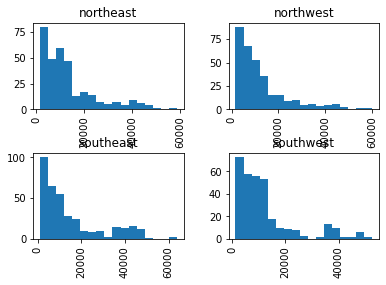

In [42]:
df['charges'].hist(by=df['region'], bins= 17)

## Bagian 3

##### Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.

In [44]:
# filter data perokok BMI >25
df_rokok_bmi25 = df.loc[(df['smoker'] == 'yes') & (df['bmi'] > 25), ['charges', 'smoker','bmi']]
df_rokok_bmi25 

,charges,smoker,bmi
0,16884.92400,yes,27.900
11,27808.72510,yes,26.290
14,39611.75770,yes,42.130
19,36837.46700,yes,35.300
23,37701.87680,yes,31.920
...,...,...,...
1308,33900.65300,yes,30.200
1313,36397.57600,yes,34.700
1321,28101.33305,yes,26.695
1323,43896.37630,yes,40.370


<AxesSubplot:xlabel='charges', ylabel='Count'>

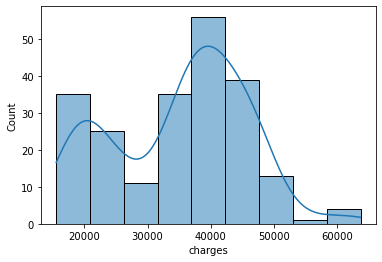

In [45]:
sns.histplot(data= df_rokok_bmi25['charges'], kde='True')

In [46]:
# mencari rata-rata tagihan dari data yang sudah difilter
df_rokok_bmi25_mean = df_rokok_bmi25['charges'].mean() 
df_rokok_bmi25_mean

35116.90965694065

In [47]:
#mendapatkan nilai standar deviasi tagihan dari data yang sudah difilter
std_rokok_bmi25 = np.std(df_rokok_bmi25['charges'])
std_rokok_bmi25

10678.098166346497

In [48]:
#nilai charges yang ingin dihitung
x = 16700

In [49]:
#menghitung standarisasi data
Z = (x-df_rokok_bmi25_mean)/std_rokok_bmi25
Z

-1.7247368744917595

In [50]:
#mendapatkan nilai CDF diatas nilai X
p = 1-norm.cdf(Z)

print(f'kemungkin terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah sebesar {p}%')

kemungkin terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah sebesar 0.9577125487589742%


In [51]:
# menggunakan syntax dari scipy untuk menghitung cdf
1-stats.norm.cdf(16700, loc= df_rokok_bmi25_mean, scale = std_rokok_bmi25)

0.9577125487589742

##### Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok

In [52]:
# memfilter perokok
df_rokok = df.loc[df['smoker'] == 'yes']
df_rokok

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


<AxesSubplot:xlabel='charges', ylabel='Count'>

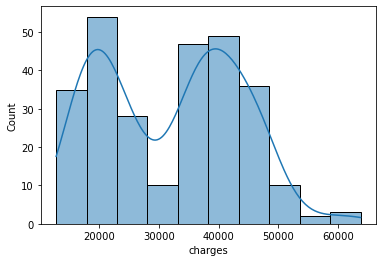

In [53]:
sns.histplot(data=df_rokok['charges'], kde = 'True')

In [54]:
# mencari rata=rata charges dari data yang sudah difilter
df_rokok_mean = df_rokok['charges'].mean()
print('rata-rata dari tagihan perokok adalah sebesar ', df_rokok_mean)

# mencari standar deviasi dari data yang sudah difilter
std_df_rokok = np.std(df_rokok['charges'])
print('standar deviasi dari tagihan perokok adalah sebesar ', std_df_rokok)

# nilai x yang diinginkan
x = 16700

#menghitung standarisasi data
Z = (x-df_rokok_mean)/std_df_rokok
print('nilai Z adalah sebesar ', Z)

#mendapatkan nilai CDF diatas nilai X
p = 1-norm.cdf(Z)
print('peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok adalah sebesar ', p)

rata-rata dari tagihan perokok adalah sebesar  32050.23183153285
standar deviasi dari tagihan perokok adalah sebesar  11520.466706529429
nilai Z adalah sebesar  -1.3324314216222535
peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok adalah sebesar  0.9086407687093684


In [55]:
# cara cepet
print('peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok adalah sebesar ',
     1-stats.norm.cdf(16700, loc= df_rokok_mean, scale = std_df_rokok))

peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok adalah sebesar  0.9086407687093684


##### Mana yang lebih mungkin terjadi
- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,atau
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [56]:
# filter data bmi>25
df_bmi25 = df.loc[df['bmi'] >25]
df_bmi25

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


In [57]:
# cari rata-rata tagihan
df_bmi25_mean = df_bmi25['charges'].mean()
print('rata-rata tagihan bagi orang dengan bmi > 25 adalah sebesar ',df_bmi25_mean)

# cari standar deviasi tagihan
std_df_bmi25 = np.std(df_bmi25['charges'])
print('standar deviasi tagihan bagi orang dengan bmi > 25 adalah sebesar ',std_df_bmi25)

# hitung peluang tagihan >16700 jika bmi >25
print('peluang seseorang yang bminya di atas 25 mendapatkan tagihan lebih dari 167000 adalah sebesar',
      1-stats.norm.cdf(16700, loc = df_bmi25_mean, scale=std_df_bmi25))

rata-rata tagihan bagi orang dengan bmi > 25 adalah sebesar  13946.47603532447
standar deviasi tagihan bagi orang dengan bmi > 25 adalah sebesar  12828.84209589184
peluang seseorang yang bminya di atas 25 mendapatkan tagihan lebih dari 167000 adalah sebesar 0.4150257865243673


In [58]:
# filter data bmi<25
df_bmikurang25 = df.loc[df['bmi'] <25]
df_bmikurang25

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
26,63,female,23.085,0,no,northeast,14451.83515
28,23,male,17.385,1,no,northwest,2775.19215
...,...,...,...,...,...,...,...
1304,42,male,24.605,2,yes,northeast,21259.37795
1306,29,female,21.850,0,yes,northeast,16115.30450
1314,30,female,23.655,3,yes,northwest,18765.87545
1316,19,female,20.600,0,no,southwest,1731.67700


In [59]:
# cari rata-rata tagihan
df_bmikurang25_mean = df_bmikurang25['charges'].mean()
print('rata-rata tagihan bagi orang dengan bmi < 25 adalah sebesar ',df_bmikurang25_mean)

# cari standar deviasi tagihan
std_df_bmikurang25 = np.std(df_bmikurang25['charges'])
print('standar deviasi tagihan bagi orang dengan bmi < 25 adalah sebesar ',std_df_bmikurang25)

# hitung peluang tagihan >16700 jika bmi <25
print('peluang seseorang yang bminya di bawah 25 mendapatkan tagihan lebih dari 167000 adalah sebesar',
      1-stats.norm.cdf(16700, loc = df_bmikurang25_mean, scale=std_df_bmikurang25))

rata-rata tagihan bagi orang dengan bmi < 25 adalah sebesar  10282.224474367351
standar deviasi tagihan bagi orang dengan bmi < 25 adalah sebesar  7505.122226232305
peluang seseorang yang bminya di bawah 25 mendapatkan tagihan lebih dari 167000 adalah sebesar 0.1962425286399061


##### Mana yang lebih mungkin terjadi
- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

###### perokok bmi >25

In [60]:
# filter data perokok BMI >25
df_rokok_bmi25 = df.loc[(df['smoker'] == 'yes') & (df['bmi'] > 25), ['charges', 'smoker','bmi']]
df_rokok_bmi25 

,charges,smoker,bmi
0,16884.92400,yes,27.900
11,27808.72510,yes,26.290
14,39611.75770,yes,42.130
19,36837.46700,yes,35.300
23,37701.87680,yes,31.920
...,...,...,...
1308,33900.65300,yes,30.200
1313,36397.57600,yes,34.700
1321,28101.33305,yes,26.695
1323,43896.37630,yes,40.370


In [61]:
# mencari rata-rata tagihan dari data yang sudah difilter
df_rokok_bmi25_mean = df_rokok_bmi25['charges'].mean() 
df_rokok_bmi25_mean

35116.90965694065

In [62]:
#mendapatkan nilai standar deviasi tagihan dari data yang sudah difilter
std_rokok_bmi25 = np.std(df_rokok_bmi25['charges'])
std_rokok_bmi25

10678.098166346497

In [63]:
print('kemungkinan terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah sebesar',
     1-stats.norm.cdf(16700, loc= df_rokok_bmi25_mean, scale = std_rokok_bmi25))

kemungkinan terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah sebesar 0.9577125487589742


###### non perokok bmi >25

In [64]:
# filter data perokok BMI >25
df_nonrokok_bmi25 = df.loc[(df['smoker'] == 'no') & (df['bmi'] > 25), ['charges', 'smoker','bmi']]
df_nonrokok_bmi25 

,charges,smoker,bmi
1,1725.5523,no,33.77
2,4449.4620,no,33.00
4,3866.8552,no,28.88
5,3756.6216,no,25.74
6,8240.5896,no,33.44
...,...,...,...
1332,11411.6850,no,44.70
1333,10600.5483,no,30.97
1334,2205.9808,no,31.92
1335,1629.8335,no,36.85


In [65]:
# cari rata-rata tagihan
df_nonrokok_bmi25_mean = df_nonrokok_bmi25['charges'].mean()
print('rata-rata tagihan bagi non perokok dengan bmi > 25 adalah sebesar ',df_nonrokok_bmi25_mean)

# cari standar deviasi tagihan
std_df_nonrokok_bmi25 = np.std(df_nonrokok_bmi25['charges'])
print('standar deviasi tagihan bagi non perokok dengan bmi > 25 adalah sebesar ',std_df_nonrokok_bmi25)

# hitung peluang tagihan non perokok >16700 jika bmi >25

print('peluang seorang non perokok yang bminya di atas 25 mendapatkan tagihan lebih dari 167000 adalah sebesar',
      1-stats.norm.cdf(16700, loc = df_nonrokok_bmi25_mean, scale=std_df_nonrokok_bmi25))

rata-rata tagihan bagi non perokok dengan bmi > 25 adalah sebesar  8629.589609712148
standar deviasi tagihan bagi non perokok dengan bmi > 25 adalah sebesar  6037.089369828358
peluang seorang non perokok yang bminya di atas 25 mendapatkan tagihan lebih dari 167000 adalah sebesar 0.09064317172700154


##### menghitung cdf charges

<AxesSubplot:xlabel='charges', ylabel='Count'>

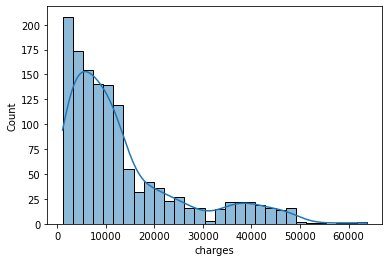

In [66]:
sns.histplot(data= df['charges'], kde = 'True')

In [67]:
mu_charges = df['charges'].mean()
std_charges = np.std(df['charges'])

# peluang seseorang dapat tagihan di atas 16700
1-stats.norm.cdf(16700, loc = mu_charges, scale=std_charges)

0.3884704677059271

## Bagian 4

In [68]:
# mengcopy dataframe dengan nama yang berbeda
df1 = pd.read_csv(r"C:\Users\KEMENKEU\Desktop\OneDrive - Kemenkeu\Sinau\Pacmann\Intro to Probability\Tugas\Project\insurance.csv")
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [69]:
# mengubah value smoker dan sex menjadi 1 dan 0
# 1 untuk smoker dan/atau female
# 0 untuk non smoker dan/atau male

df1.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df1.sex.replace(('female', 'male'), (1, 0), inplace=True)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


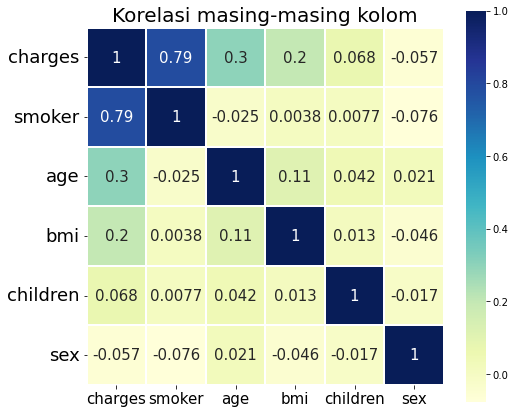

In [70]:
# melihat korelasi antar kolom
columns_corr = ['charges', 'smoker', 'age', 'bmi', 'children', 'sex']
corr = df1[columns_corr].corr()

# setting ukuran
f, ax = plt.subplots(figsize=(8,8))


# membuat heatmap
colormap = sns.heatmap(corr,
                       annot=True,
                       annot_kws ={'size':15},
                       cmap="YlGnBu", 
                       vmax=1, 
                       square=True, 
                       linewidths=2, 
                       cbar_kws={"shrink": .9}
                      )
colormap.set_xticklabels(colormap.get_xmajorticklabels(), fontsize=15, rotation=0)
colormap.set_yticklabels(colormap.get_ymajorticklabels(), fontsize=18, rotation=360)

plt.title('Korelasi masing-masing kolom', size = 20);

- feature 'smoker' is highly correlated to the target 'charges'
- features 'age' and 'bmi' are slighty correlated to the target 'charges'
- features 'children' and 'sex' are poorly correlated to the target 'charges'

## Bagian 5

##### 5.1 Buktikan hipotesis Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

#### 5.1.1. Hipotesis dan Significance Level

$$H_0: \mu perokok  \leq \mu non perokok$$
$$H_1: \mu perokok >  \mu non perokok $$

In [353]:
a = 0.05

#### 5.1.2. Tentukan statistik uji

Uji statistik yang digunakan adalah Z Test karena jumlah sample lebih dari 30

#### 5.1.3. Aturan Keputusan

- Zhitung atau Zh sebesar 1.645
- Menggunakan uji kanan
- Daerah penolakan H1 ada di sebelah kiri dengan critical value 1.645 atau dapat dikatakan bahwa daerah penerimaan H1 ada di sebelah kanan dengan critical value 1.645
- Jika statistik uji kurang dari critical value, h1 ditolak.
- Jika p value kurang dari a, h1 ditolak

#### 5.1.4. Hitung statistik uji

In [354]:
# memfilter data tagihan perokok
df_smoker = df1.loc[df['smoker'] == "yes", ['charges']]
df_smoker

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


In [355]:
# std tagihan perokok
std_smoker = np.std(df_smoker['charges'])
std_smoker

11520.466706529429

In [356]:
# memfilter tagihan non perokok
df_non_smoker = df1.loc[df['smoker'] == "no", ['charges']]
df_non_smoker

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [357]:
# std tagihan non perokok
std_non_smoker = np.std(df_non_smoker['charges'])
std_non_smoker

5990.964530287611

In [358]:
# jumlah masing-masing data perokok dan non perokok
n1 = 274
n2 = 1064

In [359]:
# rata-rata tagihan perokok
mean_smoker = df_smoker['charges'].mean()
print("rata-rata tagihan perokok adalah sebesar ", mean_smoker)

# rata-rata tagihan non perokok
mean_non_smoker = df_non_smoker['charges'].mean()
mean_non_smoker
print("rata-rata tagihan non perokok adalah sebesar ", mean_non_smoker)

# nilai alpha dan znya
a = 0.05
Z5 = 1.64


rata-rata tagihan perokok adalah sebesar  32050.23183153285
rata-rata tagihan non perokok adalah sebesar  8434.268297856199


In [360]:
# nilai Zh atau z hitung atau uji statistik
Zh = (mean_smoker-mean_non_smoker)/(np.sqrt(((std_smoker**2)/n1) +(std_non_smoker**2/n2)))
Zh

32.80892081978336

#### Hitung Uji Statistik Menggunakan library

In [361]:
# mengubah dataframe menjadi list
df_smoker_list = bmi25['charges'].values.tolist()
df_nonsmoker_list= bmi_kurang25['charges'].values.tolist()

In [362]:
# menggunakan library
stat, pvalue = ztest(df_smoker_list, df_nonsmoker_list, alternative = 'smaller', value=0)
print(stat, pvalue)

4.305033989510502 0.9999916519950433


#### 5.1.5 Pengambilan Keputusan

In [363]:
print('Pengambilan Keputusan')

# jika Zh lebih besar dari Z5 maka:
if Zh > z5:
  print('Terima H1') 
# jika Zh lebih kecil dari Z5 maka:
else:
  print('Tolak H1')

Pengambilan Keputusan
Terima H1


Oleh sebab itu, hipotesis (H1) yang menyatakan bahwa tagihan perokok lebih besar daripada tagihan non perokok diterima karena Z hitung > 1.645

In [364]:
# Pengambilan Keputusan berdasarkan alpha dan p value
if pvalue > a:
    print(' terima H1') 
else:
    print('Tolak H1')

 terima H1


Oleh sebab itu, hipotesis (H1) yang menyatakan bahwa tagihan perokok lebih besar daripada tagihan non perokok diterima karena p value > a

#### 5.2 Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

#### 5.2.1. Hipotesis dan Significance Level

$$H_0: \mu bmi lebih dari 25  \leq \mu bmi kurang dari25$$
$$H_1: \mu bmi lebih dari 25 >  \mu bmi kurang dari 25 $$

In [365]:
a= 0.05

#### 5.2.2. Tentukan statistik uji

Uji statistik yang digunakan adalah Z Test karena jumlah sample lebih dari 30

#### 5.2.3. Aturan Keputusan

- Zhitung atau Zh sebesar 1.645
- Menggunakan uji kanan
- Daerah penolakan H1 ada di sebelah kiri dengan critical value 1.645 atau dapat dikatakan bahwa daerah penerimaan H1 ada di sebelah kanan dengan critical value 1.645
- Jika statistik uji kurang dari critical value, h1 ditolak.
- Jika p value kurang dari a, h1 ditolak

#### 5.2.4. Hitung statistik uji

In [366]:
# nilai alpha dan nilai z atau critical valuenya
a = 0.05
Z5 = 1.64

In [367]:
# filter data tagihan bmi >25
bmi25 = df1.loc[df['bmi'] > 25, ['charges']]
n1 = len(bmi25)
print("Jumlah sample atau n dari tagihan bmi lebih dari 25 adalah sebanyak ", n1)

# menghitung rata-rata tagihan bmi>25
mean1 = bmi25.mean().item()
print("rata-rata tagihan bmi lebih dari 25 adalah sebesar", mean1)
      
# menghitung variance tagihan bmi>25
var1 = np.var(bmi25['charges'])
print("variance tagihan BMI lebih dari 25 adalah sebesar ",var1)


Jumlah sample atau n dari tagihan bmi lebih dari 25 adalah sebanyak  1091
rata-rata tagihan bmi lebih dari 25 adalah sebesar 13946.47603532447
variance tagihan BMI lebih dari 25 adalah sebesar  164579189.5213265


In [368]:
# filter data tagihan bmi <25
bmi_kurang25 = df1.loc[df['bmi'] < 25, ['charges']]
n2 = len(bmi_kurang25)
print("Jumlah sample atau n dari tagihan bmi kurang dari 25 adalah sebanyak ", n2)

# menghitung rata-rata tagihan bmi<25
mean2 = bmi_kurang25.mean().item()
print("rata-rata tagihan bmi lebih dari 25 adalah sebesar", mean2)
      
# menghitung variance tagihan bmi<25
var2 = np.var(bmi_kurang25['charges'])
print("variance tagihan BMI lebih dari 25 adalah sebesar ",var2)

Jumlah sample atau n dari tagihan bmi kurang dari 25 adalah sebanyak  245
rata-rata tagihan bmi lebih dari 25 adalah sebesar 10282.224474367351
variance tagihan BMI lebih dari 25 adalah sebesar  56326859.63068615


In [369]:
# hitung Z hitung
Zh = (mean1-mean2)/(np.sqrt(((var1/n1) + (var2/n2))))
Zh

5.938287213162984

#### Hitung Uji Statistik Menggunakan library

In [370]:
# mengubah dataframe menjadi list
bmi25_list = bmi25['charges'].values.tolist()
bmi_kurang25_list= bmi_kurang25['charges'].values.tolist()

In [371]:
# menggunakan library
stat, pvalue = ztest(bmi25_list, bmi_kurang25_list, alternative = 'smaller', value=0)
print(stat, pvalue)

4.305033989510502 0.9999916519950433


#### 5.2.5. Pengambilan Keputusan

In [372]:
# Pengambilan keputusan berdasarkan nilai z hitung/critical value dan nilai z5
print('Pengambilan Keputusan')

# jika Zh lebih besar dari Z5 maka:
if Zh > z5:
  print('terima H1') 
# jika Zh lebih kecil dari Z5 maka:
else:
  print('Tolak H1')

Pengambilan Keputusan
terima H1


Oleh sebab itu, hipotesis (H1) yang menyatakan bahwa tagihan perokok lebih besar daripada tagihan non perokok diterima karena Z hitung > 1.645

In [373]:
# Pengambilan Keputusan berdasarkan alpha dan p value
if pvalue > a:
    print(' terima H1') 
else:
    print('Tolak H1')

 terima H1


Oleh sebab itu, hipotesis (H1) yang menyatakan bahwa tagihan perokok lebih besar daripada tagihan non perokok diterima karena p value hitung > a

#### 5.3 Tagihan kesehatan laki-laki lebih besar dari perempuan

#### 5.3.1. Hipotesis dan Significance Level

$$H_0: \mu laki-laki  \leq \mu perempuan$$
$$H_1: \mu laki-laki >  \mu perempuan $$

In [374]:
a= 0.05

#### 5.3.2. Tentukan statistik uji

Uji statistik yang digunakan adalah Z Test karena jumlah data lebih dari 30

#### 5.3.3. Aturan Keputusan

- Zhitung atau Zh sebesar 1.645
- Menggunakan uji kanan
- Daerah penolakan H1 ada di sebelah kiri dengan critical value 1.645 atau dapat dikatakan bahwa daerah penerimaan H1 ada di sebelah kanan dengan critical value 1.645
- Jika statistik uji kurang dari critical value, h1 ditolak.
- Jika p value kurang dari a, h1 ditolak

#### 5.3.4. Hitung statistik uji

In [375]:
# nilai alpha dan nilai z atau critical valuenya
a = 0.05
Z5 = 1.645

In [376]:
# filter data tagihan laki-laki
laki = df1.loc[df['sex'] == "male", ['charges']]
n1 = len(laki)
print("Jumlah sample atau n dari tagihan laki-laki adalah sebanyak ", n1)

# menghitung rata-rata tagihan laki-laki
mean1 = laki.mean().item()
print("rata-rata tagihan laki-laki lebih adalah sebesar", mean1)
      
# menghitung variance tagihan bmi>25
var1 = np.var(laki['charges'])
print("variance tagihan laki-laki adalah sebesar ",var1)


Jumlah sample atau n dari tagihan laki-laki adalah sebanyak  676
rata-rata tagihan laki-laki lebih adalah sebesar 13956.751177721886
variance tagihan laki-laki adalah sebesar  167998626.4342233


In [377]:
# filter data tagihan perempuan
perempuan = df1.loc[df['sex'] == "female", ['charges']]
n2 = len(perempuan)
print("Jumlah sample atau n dari tagihan perempuan adalah sebanyak ", n2)

# menghitung rata-rata tagihan perempuan
mean2 = perempuan.mean().item()
print("rata-rata tagihan perempuan lebih adalah sebesar", mean2)
      
# menghitung variance tagihan perempuan 
var2 = np.var(perempuan['charges'])
print("variance tagihan perempuan adalah sebesar ",var2)


Jumlah sample atau n dari tagihan perempuan adalah sebanyak  662
rata-rata tagihan perempuan lebih adalah sebesar 12569.57884383534
variance tagihan perempuan adalah sebesar  123660966.64456923


In [378]:
# hitung Z hitung
Zh = (mean1-mean2)/(np.sqrt((var1/n1 +var2/n2)))
Zh

2.1024575937074075


#### Hitung Uji Statistik Menggunakan library

In [379]:
# mengubah dataframe menjadi list
laki_list = laki['charges'].values.tolist()
perempuan_list= perempuan['charges'].values.tolist()

In [380]:
# menggunakan syntax cepat
stat, pvalue = ztest(laki_list, perempuan_list, alternative = 'smaller', value=0)
print(stat, pvalue)

2.097546590051688 0.98202739129159


#### 5.3.5. Pengambilan Keputusan

In [381]:
# Pengambilan keputusan berdasarkan nilai z hitung/critical value dan nilai z5
print('Pengambilan Keputusan')

# jika Zh lebih besar dari Z5 maka:
if Zh > z5:
  print('terima H1') 
# jika Zh lebih kecil dari Z5 maka:
else:
  print('Tolak H1')

Pengambilan Keputusan
terima H1


Oleh sebab itu, hipotesis (H1) yang menyatakan bahwa tagihan perokok lebih besar daripada tagihan non perokok diterima karena Z hitung > 1.645

In [383]:
# Pengambilan Keputusan berdasarkan alpha dan p value
if pvalue > a:
    print(' terima H1') 
else:
    print('Tolak H1')

 terima H1


Oleh sebab itu, hipotesis (H1) yang menyatakan bahwa tagihan perokok lebih besar daripada tagihan non perokok diterima karena p value > a